In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [2]:
MyEdgeList = [(0, 1), (0, 2), (0, 3),
              (1, 2), (1, 3), (1, 4),
              (2, 3), (2, 4), (2, 5),
              (3, 4),
              (4, 5), (4, 8),
              (6, 2), (6, 4), (6, 5),
              (7, 2), (7, 5), (7, 6), (7, 8),
              (8, 2), (8, 5), (8, 6),]

In [3]:
G = nx.Graph()
G.add_edges_from(MyEdgeList)

In [4]:
CliqueList = list(nx.find_cliques(G))
print("List of cliques:\n{}".format(CliqueList))

List of cliques:
[[2, 0, 1, 3], [2, 4, 1, 3], [2, 4, 5, 8, 6], [2, 7, 8, 5, 6]]


In [5]:
print("Overlaps:")
for cc1, clique1 in enumerate(CliqueList[:-1]):
    clique1_set = set(clique1)
    for cc2, clique2 in enumerate(CliqueList[cc1+1:]):
        clique2_set = set(clique2)
        print(clique1, clique2, clique1_set.intersection(clique2_set))
    print("---")

Overlaps:
[2, 0, 1, 3] [2, 4, 1, 3] {1, 2, 3}
[2, 0, 1, 3] [2, 4, 5, 8, 6] {2}
[2, 0, 1, 3] [2, 7, 8, 5, 6] {2}
---
[2, 4, 1, 3] [2, 4, 5, 8, 6] {2, 4}
[2, 4, 1, 3] [2, 7, 8, 5, 6] {2}
---
[2, 4, 5, 8, 6] [2, 7, 8, 5, 6] {8, 2, 5, 6}
---


In [6]:
# Position of nodes:
MyPos = {0: [0.5, 0.3],
         1: [1, 0],
         2: [1.8, 1],
         3: [1, 1],
         4: [1.8, 0],
         5: [2.7, 0],
         6: [2.6, 1.5],
         7: [3.5, 0.2],
         8: [3.4, 1.2]}

In [7]:
# Overlaps:
Overlap1 = np.array([MyPos[1],
                     MyPos[2],
                     MyPos[3]])


# (2, 5, 8, 6)
Overlap2 = np.array([MyPos[2],
                     MyPos[5],
                     MyPos[8],
                     MyPos[6]])

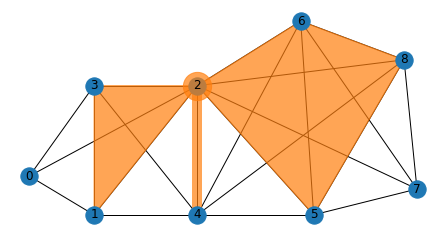

In [8]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

nx.draw_networkx(G, ax=ax, with_labels=True, pos=MyPos)

nx.draw_networkx_nodes(G, nodelist=[2], node_color='C1',
                       node_size=800, alpha=0.7, pos=MyPos)

nx.draw_networkx_edges(G, pos=MyPos, ax=ax,
                       edgelist=[(2, 4)],
                       width=10, edge_color='C1', alpha=0.7)

p1 = Polygon(xy=Overlap1, closed=True, color="C1", alpha=0.7)
p2 = Polygon(xy=Overlap2, closed=True, color="C1", alpha=0.7)
ax.add_patch(p1)
ax.add_patch(p2)

ax.set_aspect("equal")
ax.axis('off')
plt.show()